In [1]:
import pandas as pd
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt

EPISODES = 10

# set plot size larger
sns.set(rc={"figure.figsize": (11.7, 8.27)})
# set seaborn style
sns.set_style("whitegrid")

In [2]:
train_data_melted = process_data("data/train.xlsx")
train_data_melted[:100]

,Date,Hour,Price,Day of Week
0,2007-01-01,1,25.01,0
1096,2007-01-01,2,25.01,0
2192,2007-01-01,3,22.01,0
3288,2007-01-01,4,9.01,0
4384,2007-01-01,5,0.01,0
...,...,...,...,...
25211,2007-01-04,24,32.01,3
4,2007-01-05,1,22.01,4
1100,2007-01-05,2,20.01,4
2196,2007-01-05,3,18.01,4


## Random action


In [3]:
env = SmartGridBatteryEnv(train_data_melted)  # Replace with your actual environment
done = False

while not done:
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)

# convert log to dataframe
log_df = pd.DataFrame(env.log)
log_df

,Action,Battery Level,Hour,Price,Reward,Car Available
0,0.0,25.0,1.0,25.01,0.000000,NaN
1,25.0,47.5,1.0,25.01,-1.250500,True
2,20.0,50.0,2.0,25.01,-0.138944,True
3,10.0,50.0,3.0,22.01,0.000000,True
4,0.0,50.0,4.0,9.01,0.000000,True
...,...,...,...,...,...,...
26300,5.0,4.5,20.0,36.01,-0.360100,False
26301,-10.0,0.0,21.0,29.01,-0.145050,False
26302,25.0,22.5,22.0,25.01,-1.250500,False
26303,-15.0,9.0,23.0,32.01,-0.480150,False


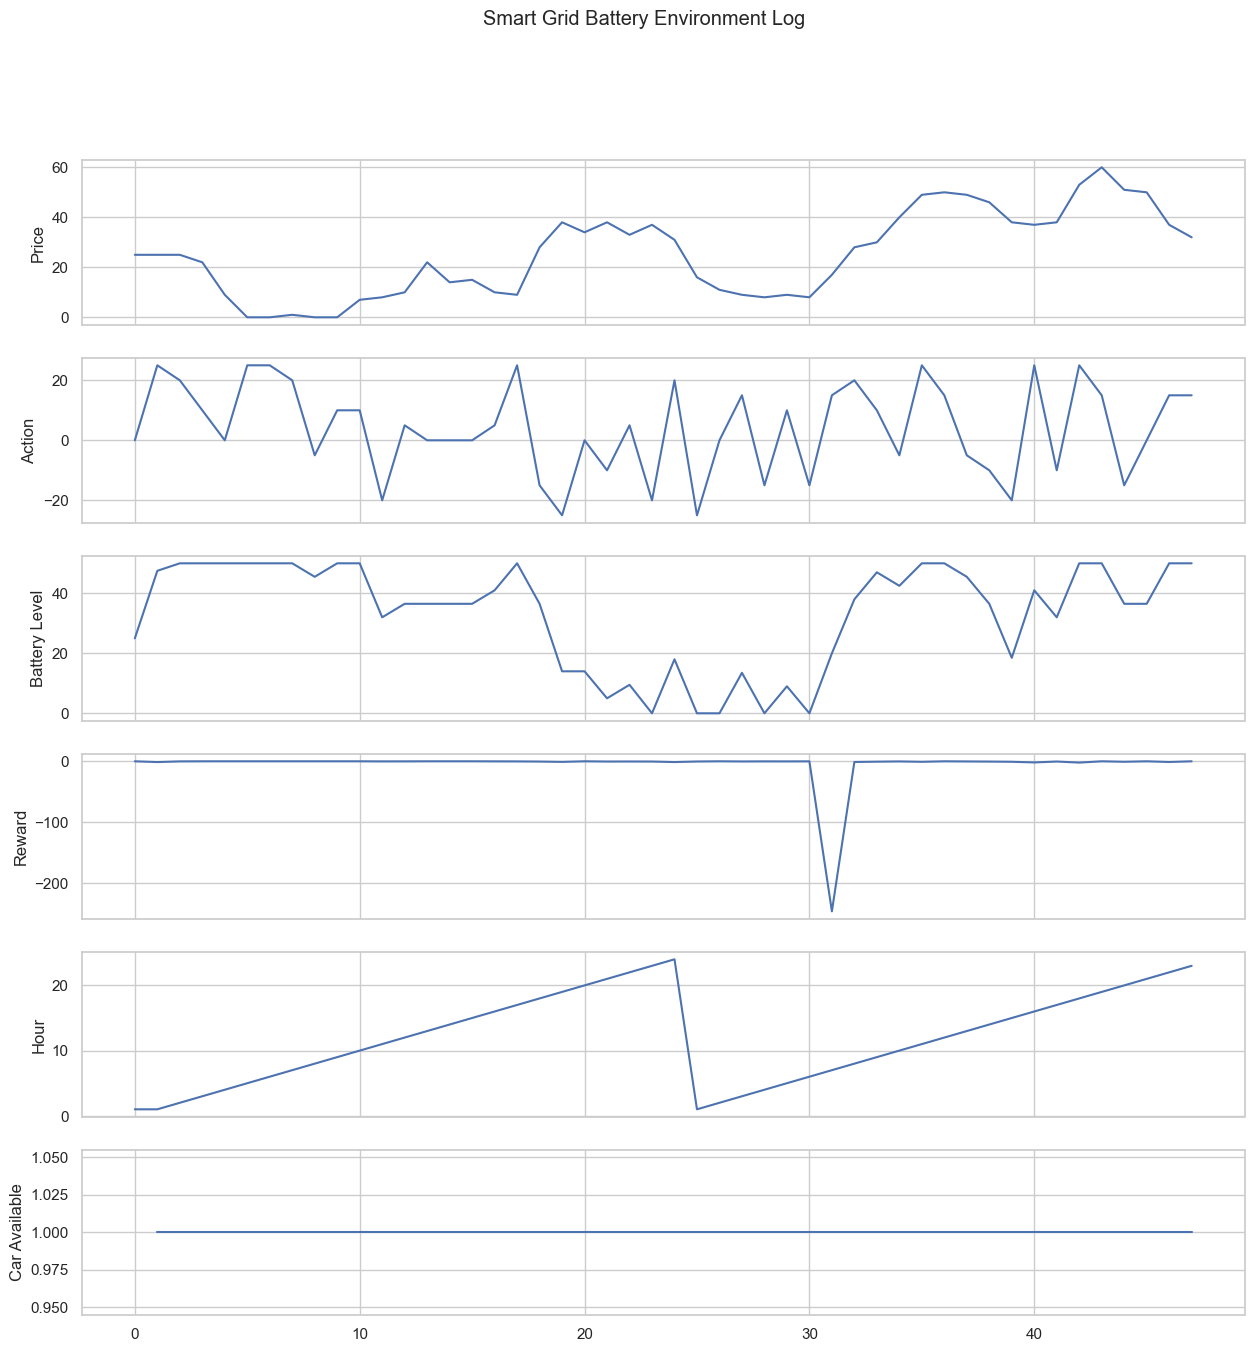

In [4]:

def plot_log(log_df):
    # plot the log: price, action, battery level, reward, car available
    fig, axes = plt.subplots(6, 1, figsize=(15, 15), sharex=True)
    fig.suptitle("Smart Grid Battery Environment Log")
    # select first 10 rows
    log_df = log_df[:48]

    sns.lineplot(ax=axes[0], data=log_df, x=log_df.index, y="Price")
    sns.lineplot(ax=axes[1], data=log_df, x=log_df.index, y="Action")
    sns.lineplot(ax=axes[2], data=log_df, x=log_df.index, y="Battery Level")
    sns.lineplot(ax=axes[3], data=log_df, x=log_df.index, y="Reward")
    sns.lineplot(ax=axes[4], data=log_df, x=log_df.index, y="Hour")
    sns.lineplot(ax=axes[5], data=log_df, x=log_df.index, y="Car Available")
plot_log(log_df)

In [5]:
env = SmartGridBatteryEnv(train_data_melted)  # Replace with your actual environment
log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        action = env.action_space.sample()  # Select a random action
        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

    # print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

env.close()  # Close the environment when done

In [6]:
log = pd.DataFrame(log)
log.head()

,Episode,Total Reward
0,1,-532676.862078
1,2,-483462.269267
2,3,-502627.745089
3,4,-524403.638483
4,5,-494913.152339


<Axes: xlabel='Episode', ylabel='Total Reward'>

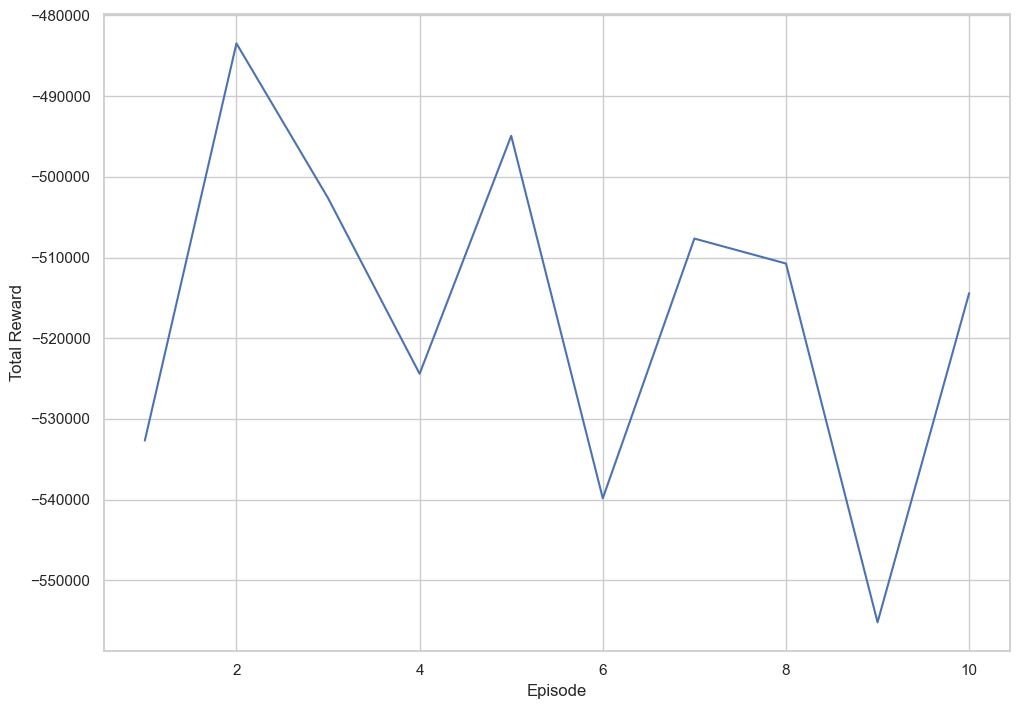

In [7]:
# plot log
sns.lineplot(data=log, x="Episode", y="Total Reward")

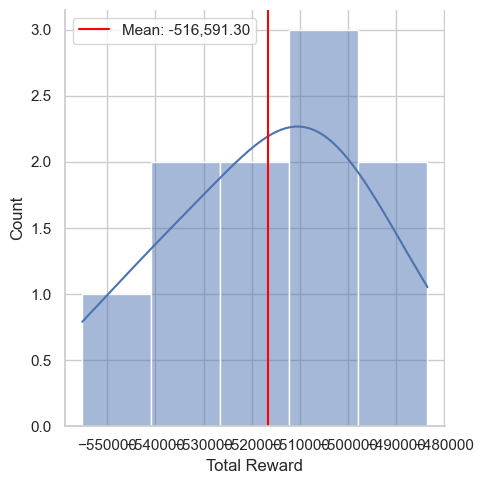

In [8]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Manual strategy 1: Buy at 5


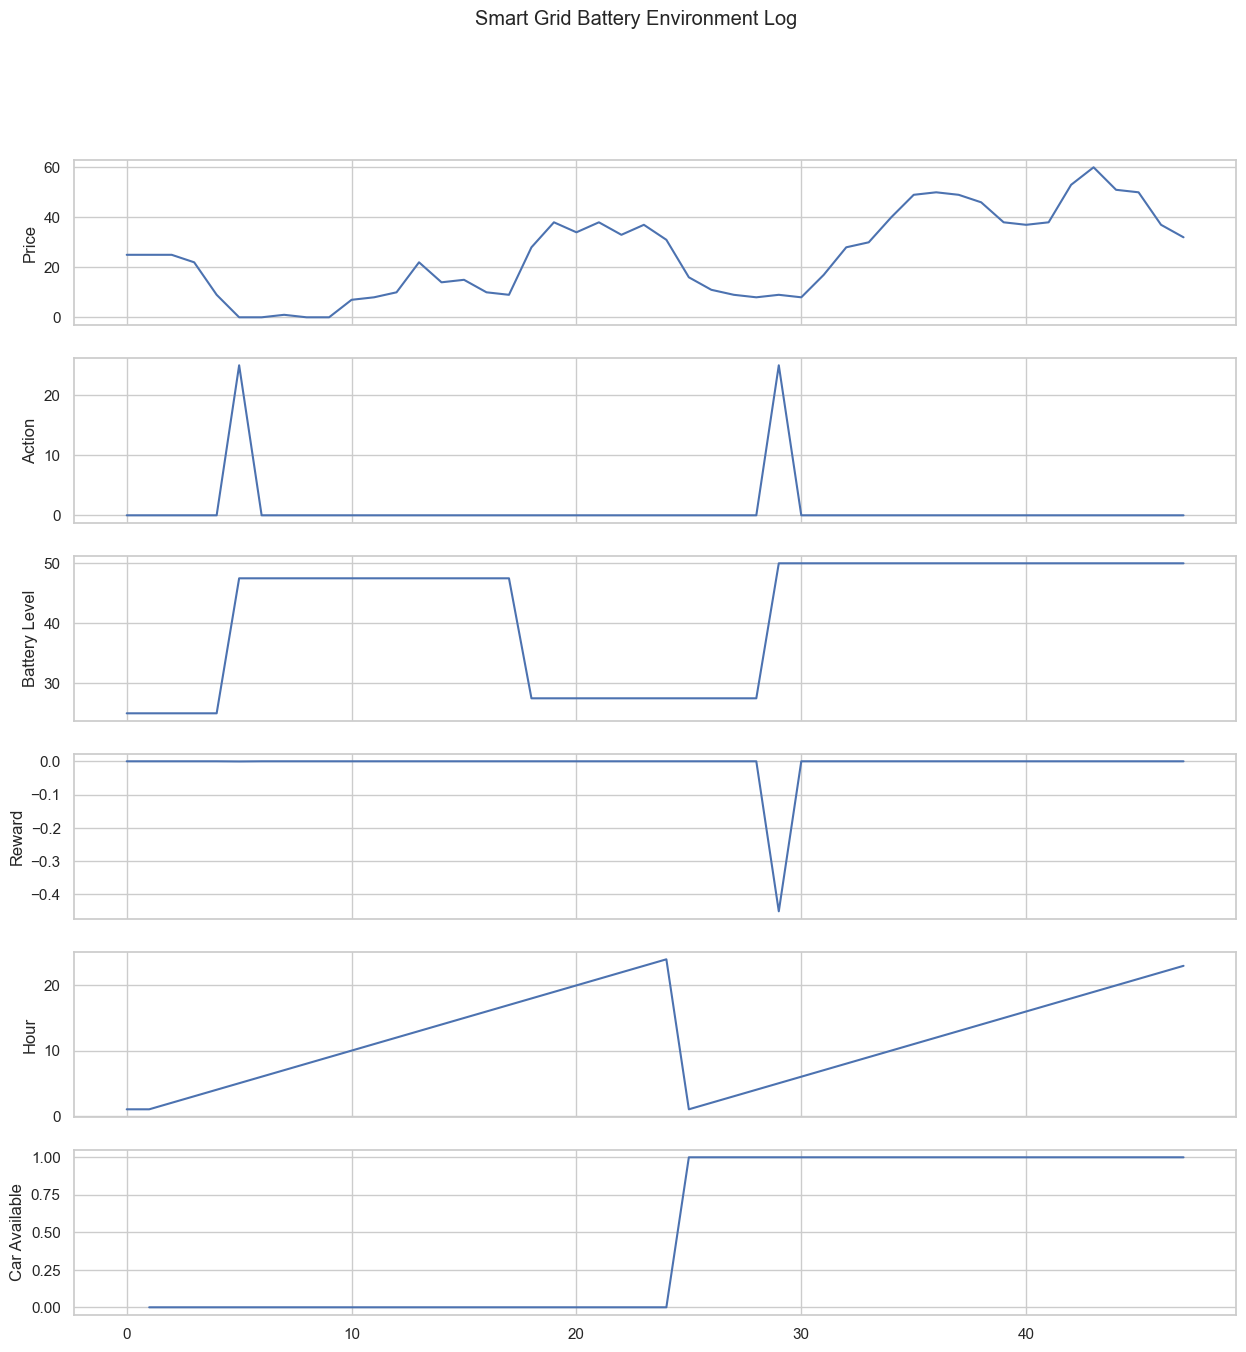

In [9]:
env = SmartGridBatteryEnv(train_data_melted)  # Replace with your actual environment
done = False

while not done:
    state = env.state
    battery_level, hour, price, weekday = state
    if hour == 5:
        action = 10
    else:
        action = 5
    next_state, reward, done, _ = env.step(action)

# convert log to dataframe
log_df = pd.DataFrame(env.log)
plot_log(log_df)

In [10]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy: always charge at hour 5 and sell at hour 11

log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price, weekday = state
        if hour == 5:
            action = 10
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()


In [11]:
log = pd.DataFrame(log)
log.head()

,Episode,Total Reward
0,1,-573.940333
1,2,-593.814111
2,3,-533.079000
3,4,-566.117222
4,5,-566.422111


<Axes: xlabel='Episode', ylabel='Total Reward'>

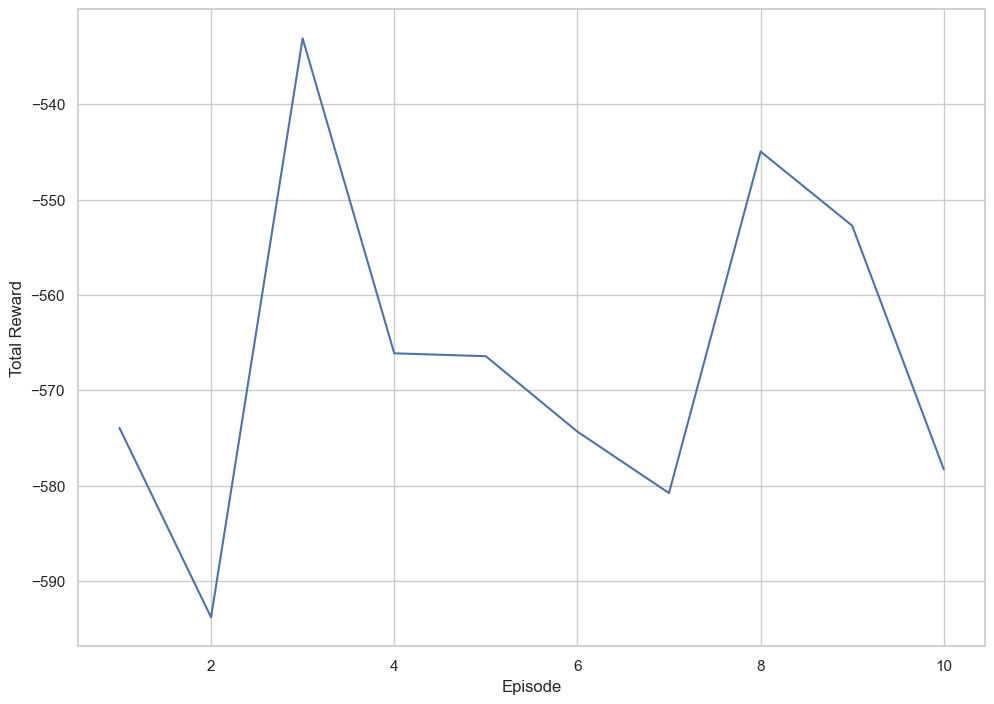

In [12]:
# plot log
sns.lineplot(data=log, x="Episode", y="Total Reward")

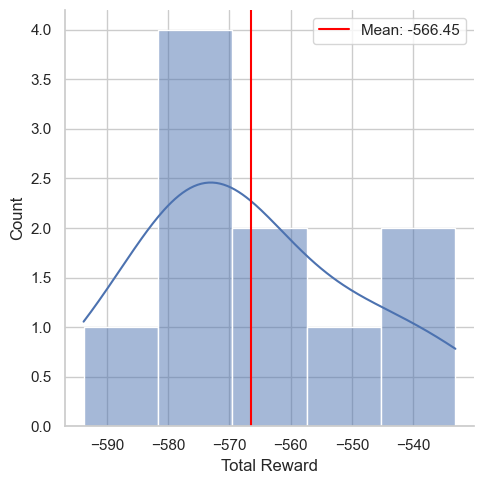

In [13]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Strategy 2: Buy 5 sell 11


In [14]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy: always charge at hour 5 and sell at hour 11

log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price, weekday = state
        # buy
        if hour == 5:
            action = 10
        # sell
        elif hour == 11:
            action = 3
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()
log = pd.DataFrame(log)
log.head()

,Episode,Total Reward
0,1,-1208.319422
1,2,-1195.887678
2,3,-1206.062967
3,4,-1204.675944
4,5,-1198.843133


<Axes: xlabel='Episode', ylabel='Total Reward'>

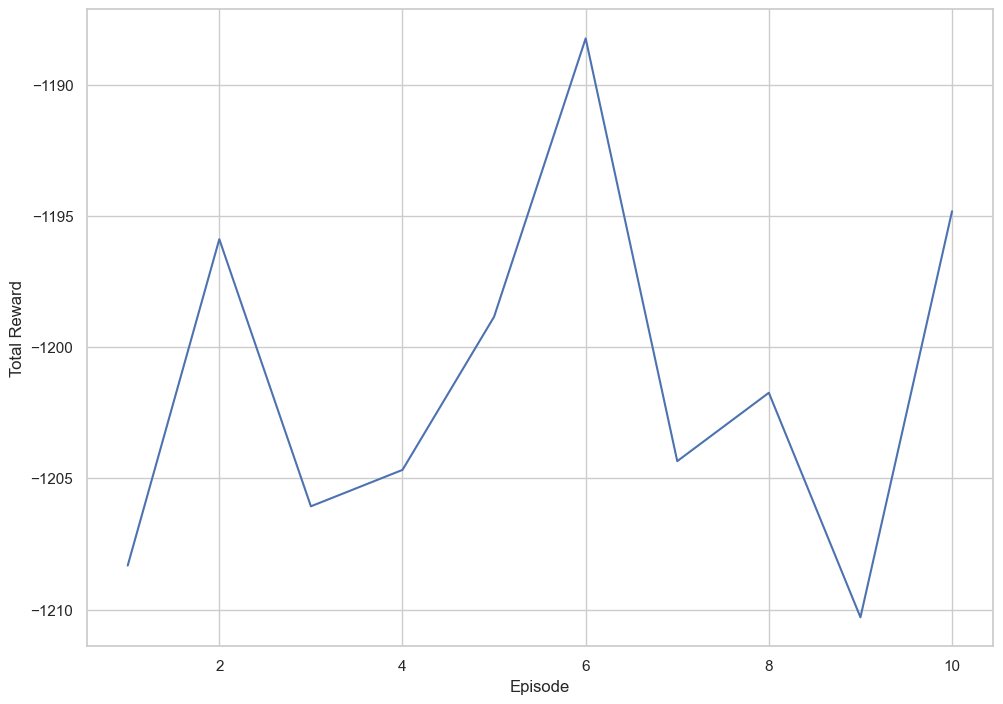

In [15]:
# plot log
sns.lineplot(data=log, x="Episode", y="Total Reward")

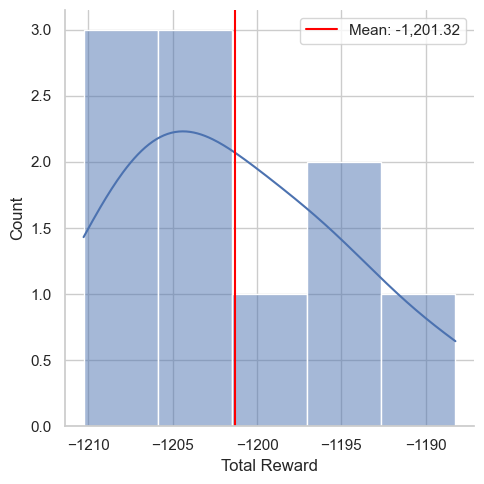

In [16]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Strategy 3: Buy 5 sell less 11


In [17]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy: always charge at hour 5 and sell at hour 11

log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price, weekday = state
        # buy
        if hour == 5:
            action = 10
        # sell
        elif hour == 11:
            action = 4
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()
log = pd.DataFrame(log)


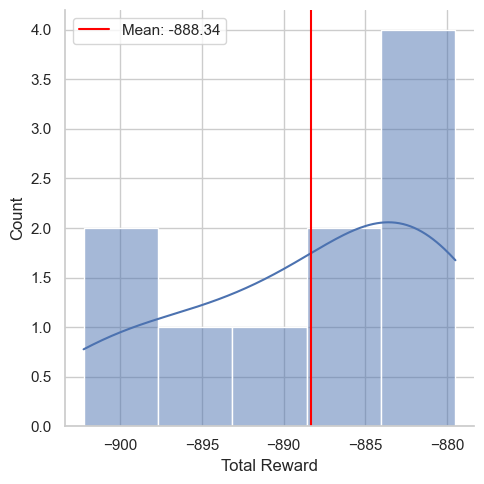

In [18]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Strategy 4: do nothing


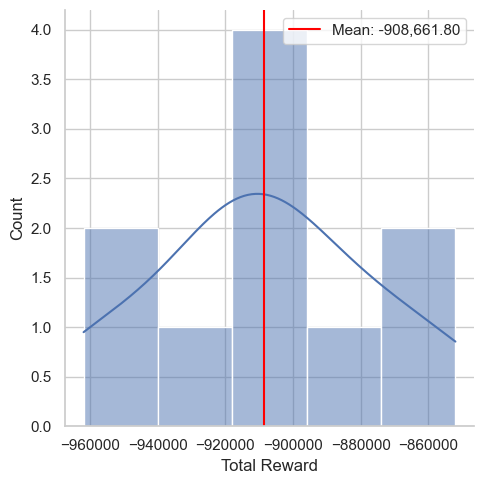

In [19]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy:

log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price, weekday = state

        action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()
log = pd.DataFrame(log)

sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()


## Strategy 5: Buy sunday, else litte


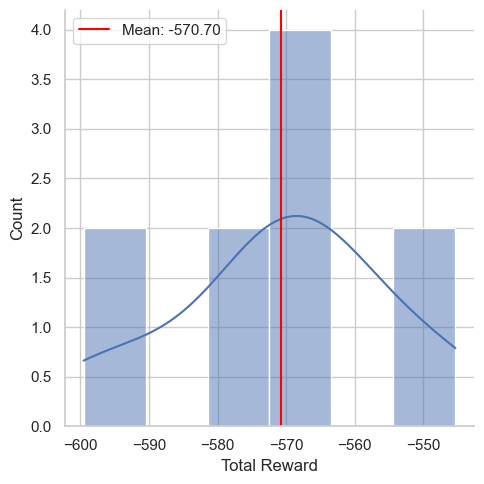

In [20]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy:

log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price, weekday = state

        if hour == 5 and weekday == 6:
            action = 10
        elif hour == 5:
            action = 9
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()
log = pd.DataFrame(log)

sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()


## RL


In [21]:
env = SmartGridBatteryEnv(train_data_melted)

total_states = 1
for space in env.observation_space:
    total_states *= space.n
action_space = env.action_space.n

# Create the agent
agent = QLearningAgent(total_states, env.action_space.n)


for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        # Choose action using the Q-learning agent
        action = agent.choose_action(state)

        # Take action and observe the next state, reward, and whether the episode is done
        next_state, reward, done, _ = env.step(action)

        # Update Q-table
        agent.update_q_table(state, action, reward, next_state)

        # Update state for the next iteration
        state = next_state

    # Decay epsilon after each episode
    agent.decay_epsilon()

# After training, you can use q_agent.q_table for making decisions in a new environment.





TypeError: unhashable type: 'numpy.ndarray'

In [22]:
import numpy as np

class MultiDimQLearningAgent:
    def __init__(self, action_space, state_dimensions, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.action_space = action_space
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        # Initialize Q-table
        self.q_table = np.zeros(state_dimensions + [len(action_space)])

    def choose_action(self, state):
        # Epsilon-greedy action selection
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        # Update Q-table with new knowledge
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error

    def decay_epsilon(self):
        # Decay epsilon for exploration-exploitation balance
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

# Example of state_dimensions for a state with 3 features, each with 10, 5, and 2 possible values respectively, and 4 possible actions
state_dimensions = [10, 5, 2] # mod this 
action_space = [0, 1, 2, 3] # mod this 
agent = MultiDimQLearningAgent(action_space, state_dimensions)

# Example training loop remains similar


In [23]:
n_episodes = 1000  # Number of episodes for training
max_steps_per_episode = 100  # Max steps per episode

# Example training loop
for episode in range(n_episodes):
    state = env.reset()  # Reset the environment and get the initial state
    total_reward = 0

    for step in range(max_steps_per_episode):
        # Convert state tuple to indices for the Q-table
        state_indices = tuple(state)

        # Select an action
        action = agent.choose_action(state_indices)

        # Perform the action in the environment
        next_state, reward, done, _ = env.step(action)

        # Convert next state tuple to indices
        next_state_indices = tuple(next_state)

        # Update Q-table
        agent.update_q_table(state_indices, action, reward, next_state_indices)

        # Update state
        state = next_state

        # Accumulate reward
        total_reward += reward

        # Break the loop if the episode is finished
        if done:
            break

    # Decay epsilon after each episode
    agent.decay_epsilon()

    # Logging
    print(f"Episode: {episode}, Total Reward: {total_reward}")

# Make sure your environment's reset and step methods return the state in the correct format
# and that actions are compatible with the agent's action space.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices